# Hierarchical Agglomerative  Clustering

           X     Y
Points            
P1      0.40  0.53
P2      0.22  0.38
P3      0.35  0.32
P4      0.26  0.19
P5      0.08  0.41
P6      0.45  0.30


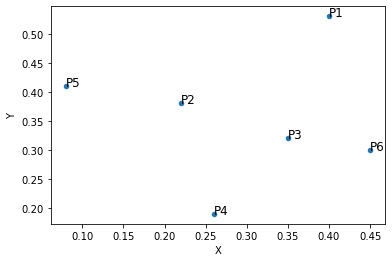

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

#create dataset
d = {"Points":["P1", 'P2', "P3", "P4", "P5", "P6"],
     'X': [0.4, 0.22, 0.35, 0.26, 0.08, 0.45], 
     'Y': [0.53, 0.38, 0.32, 0.19, 0.41, 0.3]}
data = pd.DataFrame(data=d).set_index("Points")
print(data)


#vizualizing
fig, ax = plt.subplots()
data.plot('X', 'Y', kind='scatter', ax=ax)

for k, v in data.iterrows():
    ax.annotate(k, v,  fontsize=12)

# Example  of calculating Distance Matrix

https://docs.scipy.org/doc/scipy/reference/spatial.distance.html 

In [3]:
from scipy.spatial.distance import pdist, squareform
#numpy array of our data
print("numpy array of our data\n", data.values)

numpy array of our data
 [[0.4  0.53]
 [0.22 0.38]
 [0.35 0.32]
 [0.26 0.19]
 [0.08 0.41]
 [0.45 0.3 ]]


In [4]:
# pdist - https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.pdist.html#scipy.spatial.distance.pdist
dist_condensed = pdist(data.values)
print("Pairwise distances between observations in n-dimensional space:\n", dist_condensed)

Pairwise distances between observations in n-dimensional space:
 [0.23430749 0.21587033 0.36769553 0.34176015 0.23537205 0.14317821
 0.19416488 0.14317821 0.24351591 0.15811388 0.28460499 0.10198039
 0.28425341 0.21954498 0.38600518]


In [5]:
# Convert a vector-form distance vector to a square-form distance matrix, and vice-versa.
distance_matrix = squareform(dist_condensed)
print(distance_matrix)

[[0.         0.23430749 0.21587033 0.36769553 0.34176015 0.23537205]
 [0.23430749 0.         0.14317821 0.19416488 0.14317821 0.24351591]
 [0.21587033 0.14317821 0.         0.15811388 0.28460499 0.10198039]
 [0.36769553 0.19416488 0.15811388 0.         0.28425341 0.21954498]
 [0.34176015 0.14317821 0.28460499 0.28425341 0.         0.38600518]
 [0.23537205 0.24351591 0.10198039 0.21954498 0.38600518 0.        ]]


In [6]:
dist = pd.DataFrame(distance_matrix, columns=data.index.values, index=data.index.values)
dist

,P1,P2,P3,P4,P5,P6
P1,0.000000,0.234307,0.215870,0.367696,0.341760,0.235372
P2,0.234307,0.000000,0.143178,0.194165,0.143178,0.243516
P3,0.215870,0.143178,0.000000,0.158114,0.284605,0.101980
P4,0.367696,0.194165,0.158114,0.000000,0.284253,0.219545
P5,0.341760,0.143178,0.284605,0.284253,0.000000,0.386005
P6,0.235372,0.243516,0.101980,0.219545,0.386005,0.000000


# Dendograms with different linkages
https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html

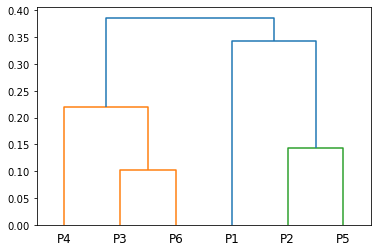

In [7]:
import scipy.cluster.hierarchy as model
dend_max = model.dendrogram(model.linkage(data[['X', 'Y']], method='complete'), labels=data.index)

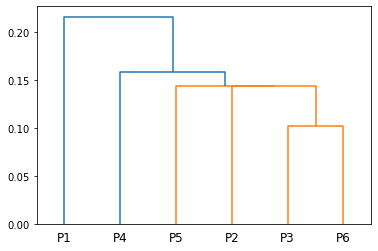

In [8]:
dend_min = model.dendrogram(model.linkage(data[['X', 'Y']], method='single'), labels=data.index)

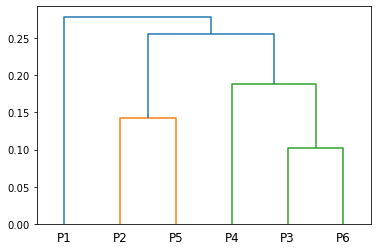

In [9]:
dend_min = model.dendrogram(model.linkage(data[['X', 'Y']], method='average'), labels=data.index)